## EDA - 1 


### O que vamos aprender/revisar?

* Escalas de medições;
* Sumarização de dados;
* Distribuição de uma variável com histogramas;
* Relações entre 2 variáveis.

### Escalas de variáveis

Para entender os dados precisamos conhecer suas escalas. 

* Escala categórica;
* Escala ordinal;
* Escala intervalar;
* Escala de razão.


In [1]:
# Carregando as bibliotecas necessárias
import numpy as np
import pandas as pd

In [2]:
# Carregando os dados
alunos_tudo = pd.read_csv('dados/alunos-ad1.csv')

In [3]:
# Tamanho do dataframe
print('O dataframe é composto por:', alunos_tudo.shape[0], 'linhas e', alunos_tudo.shape[1], 'colunas')

O dataframe é composto por: 44 linhas e 15 colunas


In [4]:
# Visualizando as primeiras linhas do arquivo
alunos_tudo.head()

,#,Você é...,"Você já cursou, está cursando ou não cursou Métodos Estatísticos?",Em quantos repositórios no github (seus ou de outras pessoas) você contribuiu nos últimos 2 anos?,Em quantas linguagens de programação você sabe programar?,Qual seu nível de confiança hoje no que você sabe sobre o que é desvio padrão?,Em quantos projetos de desenvolvimento ou pesquisa você já participou na UFCG?,Qual a sua altura em centímetros?,Qual seu peso aproximado em kg?,Quanto tempo você demora para se deslocar de casa à UFCG? (em minutos),Você geralmente vai de casa para a UFCG:,O quanto você gosta de formulários online? (Obrigado por ter respondido este!),Start Date (UTC),Submit Date (UTC),Network ID
0,7be93a16704ab173504f0873bc774245,Homem,Já cursei,3,5,7.0,1,0,73,73.0,NaN,1,2016-06-30 22:46:14,2016-06-30 22:48:32,631e9092f1
1,f8d102fff84080ec99da0953c9f5cf2a,Mulher,Estou cursando,9,3,7.0,3,154,46,20.0,de carro/moto,3,2016-06-30 23:12:57,2016-06-30 23:19:29,632f28271d
2,437aaf7a207b3237236abb18760bd4bc,Homem,Estou cursando,2,3,3.0,3,0,92,10.0,de carro/moto,5,2016-06-30 23:20:29,2016-06-30 23:27:25,7acadd86fa
3,f3a3c5fd14fda233e842919af05317e7,Homem,Estou cursando,2,2,7.0,1,181,62,10.0,a pé,4,2016-06-30 23:45:08,2016-06-30 23:56:29,9e5c0e6757
4,12376426c18614eec592a4fe39f4ab52,Homem,Já cursei,10,5,8.0,1,186,100,19.0,de carro/moto,4,2016-06-30 23:59:04,2016-07-01 00:03:02,82e7247fde


In [5]:
# Visualizando informações do dataframe
alunos_tudo.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 15 columns):
#                                                                                                    object
Você é...                                                                                            object
Você já cursou, está cursando ou não cursou Métodos Estatísticos?                                    object
Em quantos repositórios no github (seus ou de outras pessoas) você contribuiu nos últimos 2 anos?    int64
Em quantas linguagens de programação você sabe programar?                                            int64
Qual seu nível de confiança hoje no que você sabe sobre o que é desvio padrão?                       float64
Em quantos projetos de desenvolvimento ou pesquisa você já participou na UFCG?                       int64
Qual a sua altura em centímetros?                                                                    int64
Qual seu peso aproximado em kg?     

In [6]:
# Verificando dados nulos ou faltantes nas colunas
alunos_tudo.isnull().sum()

#                                                                                                    0
Você é...                                                                                            1
Você já cursou, está cursando ou não cursou Métodos Estatísticos?                                    0
Em quantos repositórios no github (seus ou de outras pessoas) você contribuiu nos últimos 2 anos?    0
Em quantas linguagens de programação você sabe programar?                                            0
Qual seu nível de confiança hoje no que você sabe sobre o que é desvio padrão?                       2
Em quantos projetos de desenvolvimento ou pesquisa você já participou na UFCG?                       0
Qual a sua altura em centímetros?                                                                    0
Qual seu peso aproximado em kg?                                                                      0
Quanto tempo você demora para se deslocar de casa à UFCG? (em minutos)   

In [7]:
# Ao carregar os dados você pode especificar os tipos das colunas, por exemplo
# OBS: As colunas deverão está em um dicionário com seus respectivos tipos {'coluna' : 'tipo'}
alunos_tudo = pd.read_csv('dados/alunos-ad1.csv',
                          dtype = {
                              '#' : 'str', 
                              'Você é...' : 'str',
                              'Qual a sua altura em centímetros?' : 'int64'
                          })

Os nomes de variável vem do dataset e não estão ajudando. Vamos renomeá-las.

In [8]:
# Criando um novo dataframe a partir das colunas selecionadas
alunos = alunos_tudo[['Você é...', 
                      'Em quantos repositórios no github (seus ou de outras pessoas) você contribuiu nos últimos 2 anos?',
                      'Em quantas linguagens de programação você sabe programar?',
                      'Qual a sua altura em centímetros?',
                      'Quanto tempo você demora para se deslocar de casa à UFCG? (em minutos)',
                      'Você geralmente vai de casa para a UFCG:',
                      'O quanto você gosta de formulários online? (Obrigado por ter respondido este!)']]
# Renomeando as colunas
alunos.columns = ['sexo', 'repositorios', 'linguagens', 'altura', 'tempo_para_ufcg', 'transporte',
                 'gosta_de_forms']
# Visualizando as primeiras linhas do dataframe resultante
alunos.head()

,sexo,repositorios,linguagens,altura,tempo_para_ufcg,transporte,gosta_de_forms
0,Homem,3,5,0,73.0,NaN,1
1,Mulher,9,3,154,20.0,de carro/moto,3
2,Homem,2,3,0,10.0,de carro/moto,5
3,Homem,2,2,181,10.0,a pé,4
4,Homem,10,5,186,19.0,de carro/moto,4


### Observações

O que significa uma observação neste dataset? Isso precisa *sempre* ser entendido.

### Variáveis categóricas

O que são? Existem variáveis categóricas no nosso dataset?

In [9]:
num_homens = alunos[alunos['sexo'] == 'Homem'].shape[0]
num_mulheres = alunos[alunos['sexo'] == 'Mulher'].shape[0]

if(num_homens > num_mulheres):
   print('Homem')
else:
   print('Mulher')

print('Percentual de homens: ', num_homens/(num_homens+num_mulheres))

Homem
Percentual de homens:  0.8604651162790697


In [10]:
# Outra maneira de fazer a mesma coisa
sexo = alunos['sexo'].value_counts()

if(sexo.values[0] > sexo.values[1]):
   print('Homem')
else:
   print('Mulher')

print('Percentual de homens: ', sexo.values[0]/sexo.values.sum())

Homem
Percentual de homens:  0.8604651162790697


In [11]:
# Ver a moda
print(alunos['sexo'].mode())

0    Homem
dtype: object


Os homens são top-86%. O que significa isso? Vejamos um exemplo com mais categorias: transporte

In [17]:
transporte = alunos['transporte'].value_counts()
transporte

de carro/moto    20
de ônibus        16
a pé              7
Name: transporte, dtype: int64

Quem é a moda? E em termos de dispersão, o que podemos dizer?

In [13]:
#alunos.transporte.mode()

In [16]:
# Apresentar o percentual 
#transporte.values.max()/transporte.values.sum()
alunos['transporte'].value_counts(normalize=True)[0]

0.46511627906976744

## Visualizações

In [15]:
# Bibliotecas necessárias para plotar as vizualizações
import matplotlib.pyplot as plt
# Plotar os gráficos direto no jupyter notebook
%matplotlib inline
# Definir o tamanho e a resolução em DPI(Dots Per Inch) das figuras plotadas.
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':100})
# Definir o estilo dos gráficos semelhantes ao ggplot
plt.style.use('seaborn-whitegrid')
#plt.style.use('ggplot')

### Gráficos de barra

Plotagem de gráficos com a biblioteca pandas

(array([0, 1]), <a list of 2 Text xticklabel objects>)

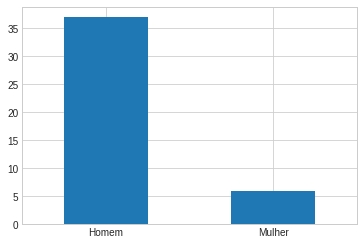

In [16]:
alunos.sexo.value_counts().plot(kind='bar')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

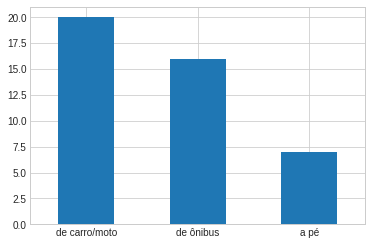

In [17]:
alunos.transporte.value_counts().plot.bar()
plt.xticks(rotation=0)

## Escala ordinal

O que é? Exemplo?

In [18]:
alunos_tudo.head()

,#,Você é...,"Você já cursou, está cursando ou não cursou Métodos Estatísticos?",Em quantos repositórios no github (seus ou de outras pessoas) você contribuiu nos últimos 2 anos?,Em quantas linguagens de programação você sabe programar?,Qual seu nível de confiança hoje no que você sabe sobre o que é desvio padrão?,Em quantos projetos de desenvolvimento ou pesquisa você já participou na UFCG?,Qual a sua altura em centímetros?,Qual seu peso aproximado em kg?,Quanto tempo você demora para se deslocar de casa à UFCG? (em minutos),Você geralmente vai de casa para a UFCG:,O quanto você gosta de formulários online? (Obrigado por ter respondido este!),Start Date (UTC),Submit Date (UTC),Network ID
0,7be93a16704ab173504f0873bc774245,Homem,Já cursei,3,5,7.0,1,0,73,73.0,NaN,1,2016-06-30 22:46:14,2016-06-30 22:48:32,631e9092f1
1,f8d102fff84080ec99da0953c9f5cf2a,Mulher,Estou cursando,9,3,7.0,3,154,46,20.0,de carro/moto,3,2016-06-30 23:12:57,2016-06-30 23:19:29,632f28271d
2,437aaf7a207b3237236abb18760bd4bc,Homem,Estou cursando,2,3,3.0,3,0,92,10.0,de carro/moto,5,2016-06-30 23:20:29,2016-06-30 23:27:25,7acadd86fa
3,f3a3c5fd14fda233e842919af05317e7,Homem,Estou cursando,2,2,7.0,1,181,62,10.0,a pé,4,2016-06-30 23:45:08,2016-06-30 23:56:29,9e5c0e6757
4,12376426c18614eec592a4fe39f4ab52,Homem,Já cursei,10,5,8.0,1,186,100,19.0,de carro/moto,4,2016-06-30 23:59:04,2016-07-01 00:03:02,82e7247fde


#### Podemos ordenar e obter percentis, moda, top-frequent.

Quem é a moda? 

Quem é top-frequent?

In [19]:
# Frequência
alunos.groupby('gosta_de_forms').size()
# Frequência (outra forma)
#alunos['gosta_de_forms'].value_counts()

gosta_de_forms
1     3
2     4
3     6
4    15
5    16
dtype: int64

In [20]:
# Moda
print('Moda:', alunos.gosta_de_forms.mode())

Moda: 0    5
dtype: int64


In [21]:
# Calculando o percentual do valor mais frequente
alunos.groupby('gosta_de_forms').size().max()/alunos.groupby('gosta_de_forms').size().sum()

0.36363636363636365

In [22]:
# Mediana
print('Mediana:', alunos.gosta_de_forms.median())

Mediana: 4.0


In [23]:
# Quartil
print('Quartil1:', alunos.gosta_de_forms.quantile(q=0.25))
print('Quartil3:', alunos.gosta_de_forms.quantile(q=0.75))

Quartil1: 3.0
Quartil3: 5.0


In [24]:
# Visualizando as estatísticas básicas de uma coluna específica
alunos.gosta_de_forms.describe()

count    44.000000
mean      3.840909
std       1.218905
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: gosta_de_forms, dtype: float64

In [25]:
# Visualizando as estatísticas básicas das variáveis numéricas do dataframe
desc_num = alunos_tudo.describe(include=[np.number])
desc_num.loc['count'] = desc_num.loc['count'].astype(int)
desc_num.iloc[1:] = desc_num.iloc[1:].applymap('{:.2f}'.format)
desc_num.T

,count,mean,std,min,25%,50%,75%,max
Em quantos repositórios no github (seus ou de outras pessoas) você contribuiu nos últimos 2 anos?,44,7.18,5.74,0.00,3.00,5.00,10.00,23.00
Em quantas linguagens de programação você sabe programar?,44,3.95,1.46,2.00,3.00,4.00,5.00,8.00
Qual seu nível de confiança hoje no que você sabe sobre o que é desvio padrão?,42,6.50,2.34,0.00,5.25,7.00,8.00,10.00
Em quantos projetos de desenvolvimento ou pesquisa você já participou na UFCG?,44,1.59,1.02,0.00,1.00,1.00,2.25,3.00
Qual a sua altura em centímetros?,44,166.86,37.83,0.00,167.75,175.00,182.00,190.00
Qual seu peso aproximado em kg?,44,71.27,14.09,46.00,60.75,69.50,77.25,100.00
Quanto tempo você demora para se deslocar de casa à UFCG? (em minutos),43,27.00,22.01,2.00,10.00,20.00,30.00,90.00
O quanto você gosta de formulários online? (Obrigado por ter respondido este!),44,3.84,1.22,1.00,3.00,4.00,5.00,5.00


In [26]:
# Visualizando as estatísticas básicas das variáveis categóricas do dataframe
desc_cat = alunos_tudo.describe(include=[np.object])
desc_cat.T

,count,unique,top,freq
#,44,44,7be93a16704ab173504f0873bc774245,1
Você é...,43,2,Homem,37
"Você já cursou, está cursando ou não cursou Métodos Estatísticos?",44,3,Já cursei,29
Você geralmente vai de casa para a UFCG:,43,3,de carro/moto,20
Start Date (UTC),44,44,2017-05-09 21:45:59,1
Submit Date (UTC),44,44,2016-07-01 17:14:32,1
Network ID,44,40,2804:7f7:2,3


#### Podemos ter um histograma de dados ordinais? O que é um histograma?

In [27]:
alunos['gosta_de_forms'].value_counts()

5    16
4    15
3     6
2     4
1     3
Name: gosta_de_forms, dtype: int64

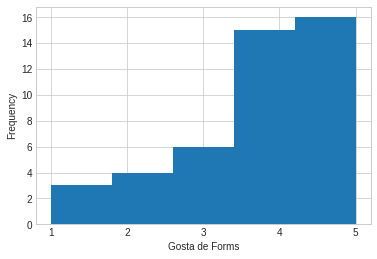

In [28]:
alunos['gosta_de_forms'].plot(kind='hist', bins=5)
labels=range(1,6)
plt.xticks(labels)
plt.xlabel('Gosta de Forms')
plt.show()

### Escalas de razão

São números com suas intensidades e 0 significa ausência do valor medido. Temos exemplos nos dados?

In [29]:
alunos.T

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
sexo,Homem,Mulher,Homem,Homem,Homem,Homem,Homem,Homem,Homem,Homem,...,Homem,Homem,Mulher,Homem,Homem,Homem,Homem,Homem,Homem,Homem
repositorios,3,9,2,2,10,5,20,10,4,4,...,20,3,4,10,3,10,10,8,10,6
linguagens,5,3,3,2,5,4,3,5,8,3,...,6,5,2,4,6,4,4,4,4,3
altura,0,154,0,181,186,182,184,167,182,160,...,190,168,165,185,175,182,165,168,177,183
tempo_para_ufcg,73,20,10,10,19,30,60,25,15,90,...,10,7,15,60,20,10,10,15,25,80
transporte,NaN,de carro/moto,de carro/moto,a pé,de carro/moto,de ônibus,de ônibus,de ônibus,a pé,de ônibus,...,a pé,a pé,de carro/moto,de ônibus,de carro/moto,de carro/moto,de carro/moto,de carro/moto,de carro/moto,de ônibus
gosta_de_forms,1,3,5,4,4,5,4,5,3,3,...,5,4,5,4,4,5,4,4,3,5


Que variávies tem uma escala de razão? O que podemos fazer com essas variáveis?

Histograma!

In [30]:
alunos.linguagens.value_counts()

3    14
4    10
5     8
2     6
6     3
7     2
8     1
Name: linguagens, dtype: int64

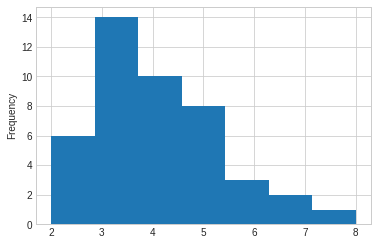

In [31]:
alunos.linguagens.plot(kind='hist', bins=7)

O mesmo podemos fazer para tempo de transporte. Agora considerando por faixas de valores diferentes (Bins = faixas).

*bins são uma parte muito importante*


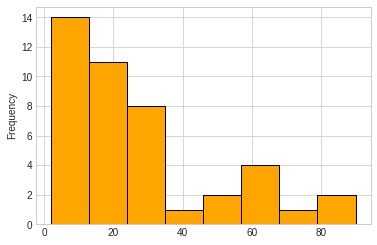

In [32]:
alunos.tempo_para_ufcg.plot(kind='hist', bins=8, color='orange', edgecolor='black')

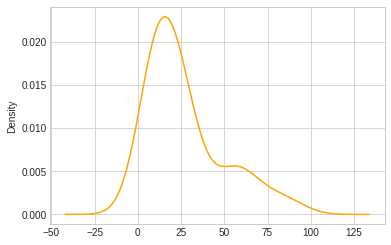

In [33]:
alunos.tempo_para_ufcg.plot(kind='density', color='orange')

Para variáveis contínuas, a função de densidade pode ser usada.

Mais informação sobre tempo para chegar na UFCG:

In [34]:
# Utilizando a biblioteca gráfica seaborn
import seaborn as sns
sns.set(style="whitegrid")

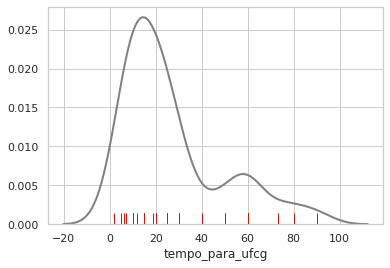

In [35]:
sns.distplot(alunos.tempo_para_ufcg.dropna(), 
             hist=False,
             kde_kws={'color':'gray', 'linewidth': 2},
             rug=True,
             rug_kws={'color':'red'})

Vamos ver agora a distribuição da altura dos alunos:

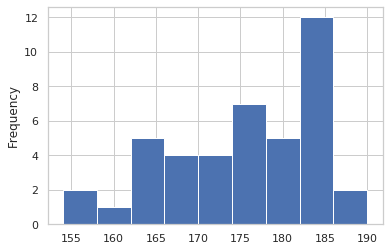

In [36]:
alunos[alunos.altura >= 150]['altura'].plot(kind='hist', bins=9)

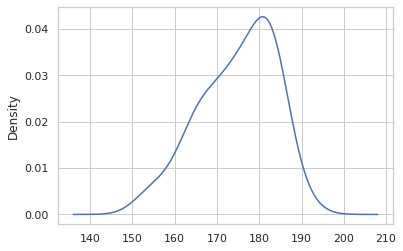

In [37]:
alunos[alunos.altura >= 150]['altura'].plot(kind='density')

### Índices de tendência central e dispersão

In [38]:
# Média
print('Média:', alunos.linguagens.dropna().mean())
# Mediana
print('Mediana:', alunos.linguagens.dropna().median())
# Variância
print('Variância:', alunos.linguagens.dropna().var())
# Desvio padrão
print('Desvio padrão:', alunos.linguagens.dropna().std())

Média: 3.9545454545454546
Mediana: 4.0
Variância: 2.137420718816067
Desvio padrão: 1.4619920378771107


### Análise exploratória dos dados

Em uma análise exploratória buscamos entender os dados em mãos. Não queremos ainda inferir nada. 
Como? Fazendo perguntas...

Como as distribuições do "tempo para chegar na UFCG" mudam para cada tipo diferente de transporte?


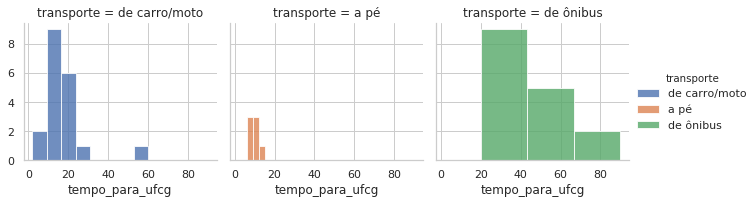

In [39]:
fig = sns.FacetGrid(alunos, col='transporte', hue='transporte')
fig.map(sns.distplot, 'tempo_para_ufcg', kde=False, hist_kws={'alpha': .8})
fig.add_legend()
plt.show()

In [40]:
alunos.transporte.value_counts()

de carro/moto    20
de ônibus        16
a pé              7
Name: transporte, dtype: int64

### scatter plot
Olhando variáveis de razão e categóricas juntas em um scatterplot:

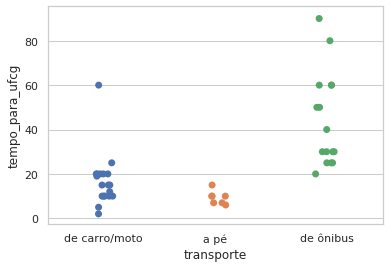

In [41]:
#sns.scatterplot(x='transporte', y='tempo_para_ufcg', data=alunos, s=50, lw=1)
# Como o (x,y)_jitter ainda não é funcional no scatteploter do seaborn utilizaremos o stripplot
# para exibir os dados espalhados
sns.stripplot(x='transporte', y='tempo_para_ufcg', data=alunos, s=7, lw=1)
plt.show()

### Boxplot

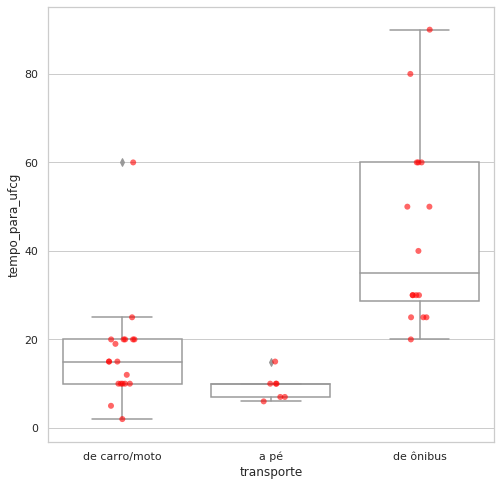

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(x='transporte', y='tempo_para_ufcg', data=alunos, color='white')
sns.stripplot(x='transporte', y='tempo_para_ufcg', data=alunos, s=6, color='red', alpha=0.6)

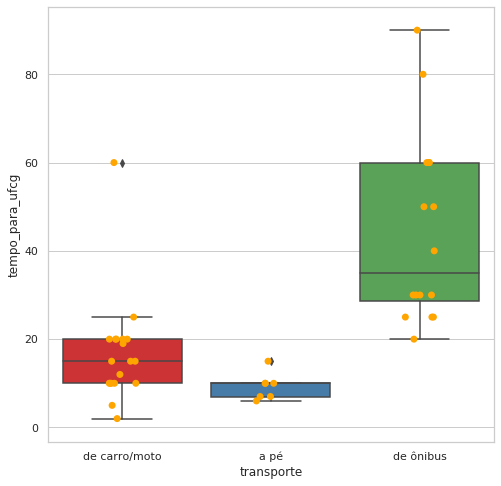

In [43]:
# outra forma 
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(x='transporte', y='tempo_para_ufcg', data=alunos, palette='Set1')
sns.stripplot(x='transporte', y='tempo_para_ufcg', data=alunos, s=7, color='orange')
plt.show()

In [44]:
# Algumas estatísticas sobre a variável transporte
alunos_transporte = alunos.groupby('transporte', as_index=False).agg({'tempo_para_ufcg':['min', 'mean', 'std', 'max'] })
alunos_transporte.columns = ['transporte', 'tempo_minimo', 'tempo_medio', 'variabilidade', 'tempo_maximo']
alunos_transporte

,transporte,tempo_minimo,tempo_medio,variabilidade,tempo_maximo
0,a pé,6.0,9.285714,3.039424,15.0
1,de carro/moto,2.0,16.736842,12.045479,60.0
2,de ônibus,20.0,44.062500,21.151734,90.0


Será que a altura das pessoas tem relação com seu gênero? homens e mulheres tem a mesma altura?

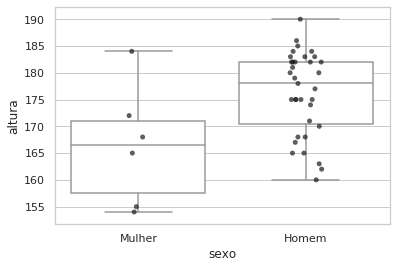

In [45]:
sns.boxplot(x='sexo', y='altura', data=alunos[alunos.altura >= 150], color='white')
sns.stripplot(x='sexo', y='altura', data=alunos[alunos.altura >= 150], s=5, lw=1, color='k', alpha=0.7)
plt.show()

### Scatter plot
Será que os alunos que chegam mais rápido na UFCG sabem mais linguagens?

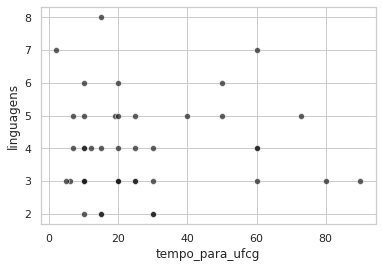

In [46]:
# OBS: No scritp R y='repositorios'
sns.scatterplot(x='tempo_para_ufcg', y='linguagens', data=alunos, color='k', alpha=0.7)
plt.show()

Será que os alunos que tem mais repositorios sabem masi linguagens?

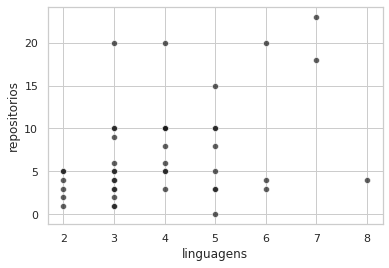

In [47]:
sns.scatterplot(x='linguagens', y='repositorios', data=alunos, color='k', alpha=0.7)
plt.show()

Será que há uma relação entre altura e número de linguagens que um aluno sabe?

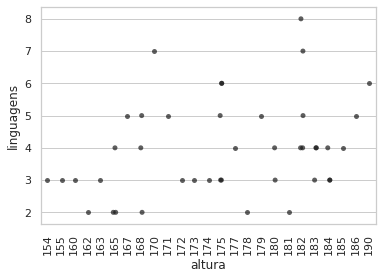

In [48]:
fig = sns.stripplot(x='altura', y='linguagens', data=alunos[alunos.altura>0], color='k', alpha=0.7)
plt.setp(fig.get_xticklabels(), rotation=90)
plt.show()

Será que os alunos que chegam mais rápido na UFCG tem mais repositórios?

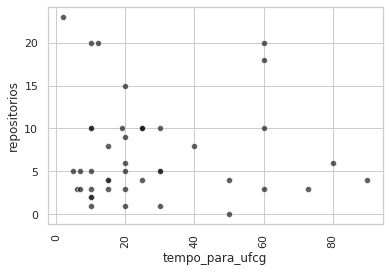

In [49]:
fig = sns.scatterplot(x='tempo_para_ufcg', y='repositorios', data=alunos, lw=1, color='k', alpha=0.7)
plt.setp(fig.get_xticklabels(), rotation=90)
plt.show()

### Uma visão geral de todas as variáveis 2 a 2 de uma vez

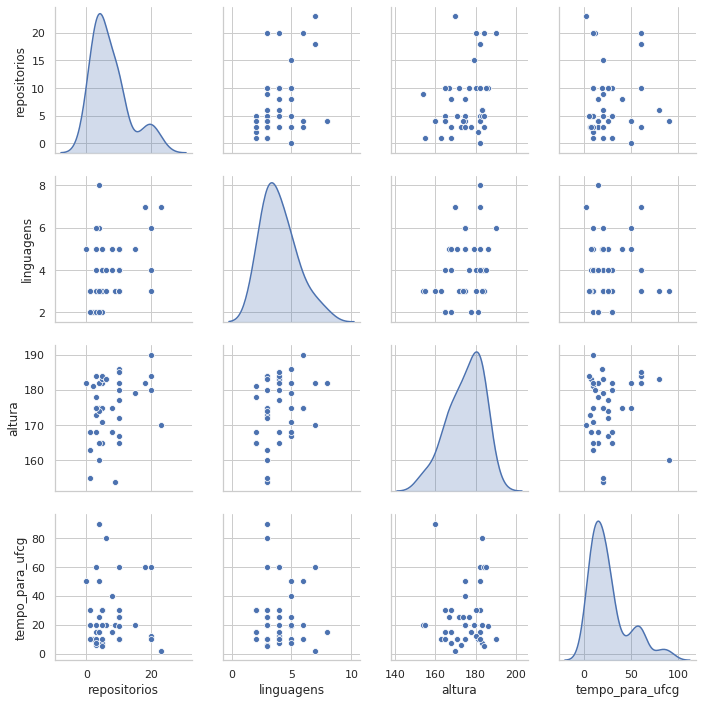

In [50]:
# Filtrando as colunas necessárias
alunos_filter = alunos[['repositorios', 'linguagens', 'altura', 'tempo_para_ufcg']].dropna()
# Plotando o pairplot
sns.pairplot(alunos_filter[alunos_filter.altura > 1], diag_kind='kde')
plt.show()

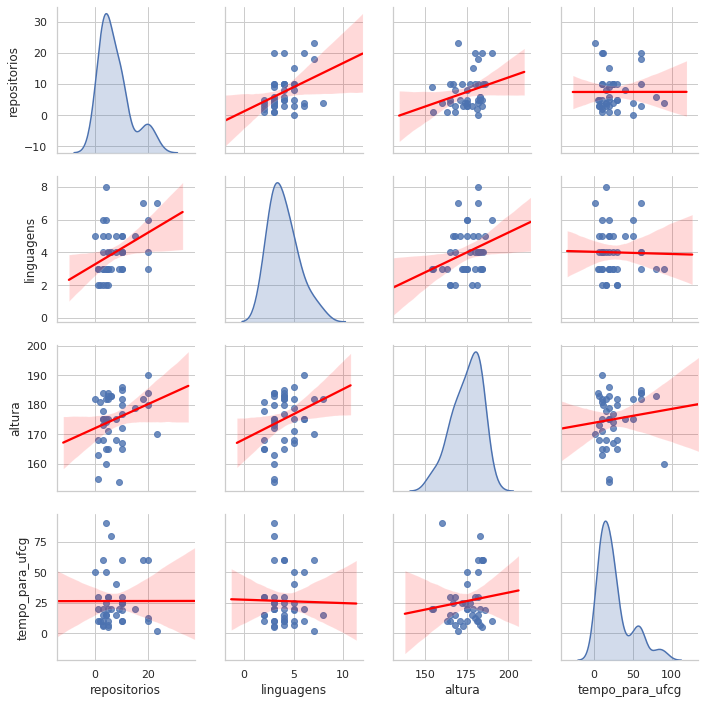

In [51]:
# Plotando o pairplot com a linha de regressão
sns.pairplot(alunos_filter[alunos_filter.altura > 1], diag_kind='kde', kind='reg', 
             plot_kws={'line_kws':{'color':'red'}})
plt.show()

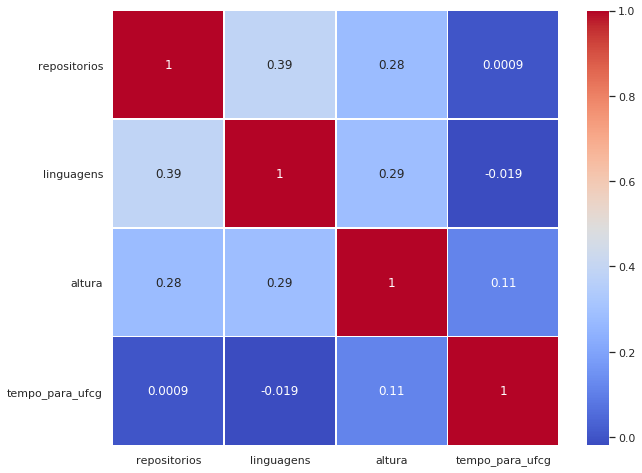

In [52]:
# Mapa de calor das correlações
correlacoes = alunos_filter[alunos_filter.altura > 1].corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlacoes, annot=True, linewidths=.5, cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.show()

### Correlações

Para testar as correlações entre variáveis podemos utilizar:

  - Se os dados são normais com relação linear
      - **Pearson** (dados normais / relação linear)
      - **Spearman** (amostras maiores)
      - **Kendall** (amostras pequenas)

  - Dados não normais e/ou sem relação linear
      - **Spearman** (amostras maiores) 
          - Ideal quando temos variáveis medidas apenas em uma escala ordinal.
      - **Kendall** (amostras pequenas)
          - Coeficiente de Kendall é, muitas vezes, interpretado como uma medida de concordância entre dois conjuntos de classificações relativas a um conjunto de objetos de estudo.

In [53]:
# Importando a biblioteca necessária
from scipy.stats import pearsonr, spearmanr, kendalltau

In [54]:
# Calculando a correlação de pearson
x = alunos_filter.linguagens
y = alunos_filter.repositorios
coef, p = pearsonr(x,y)
print('Correlação de pearson: %.2f' % coef)

Correlação de pearson: 0.38


In [55]:
# Calculando a correlação de spearman
x = alunos_filter.linguagens
y = alunos_filter.repositorios
coef, p = spearmanr(x,y)
print('Correlação de spearman: %.2f' % coef)

Correlação de spearman: 0.34


In [56]:
# Calculando a correlação de kendall
x = alunos_filter.linguagens
y = alunos_filter.repositorios
coef, p = kendalltau(x,y)
print('Correlação de kendall: %.2f' % coef)

Correlação de kendall: 0.28
